In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [6]:
# Load the CSV file
df = pd.read_csv(r"C:\Users\Aniket Goswami\Downloads\archive (1)\netflix_titles.csv")
df.shape
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')

# Extract year and month from the date added column
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Fill missing categorical columns with unknown parameter
for col in ['director', 'cast', 'country', 'rating']:
    df[col] = df[col].fillna('Unknown')

# Split duration(some are in seasons and some are in minutes)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')
df['duration_value'] = df['duration'].str.extract(r'(\d+)').astype(float)



C:\Users\Aniket Goswami\AppData\Local\Temp\ipykernel_29576\1854311595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


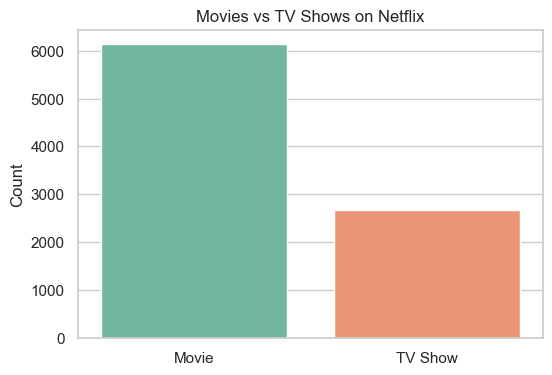

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

In [15]:
#Univariate Analysis - Analysing a single variable at a time
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('')
plt.ylabel('Count')
plt.show()
df['type'].value_counts(normalize=True) * 100#(Converting percentage to numeric)


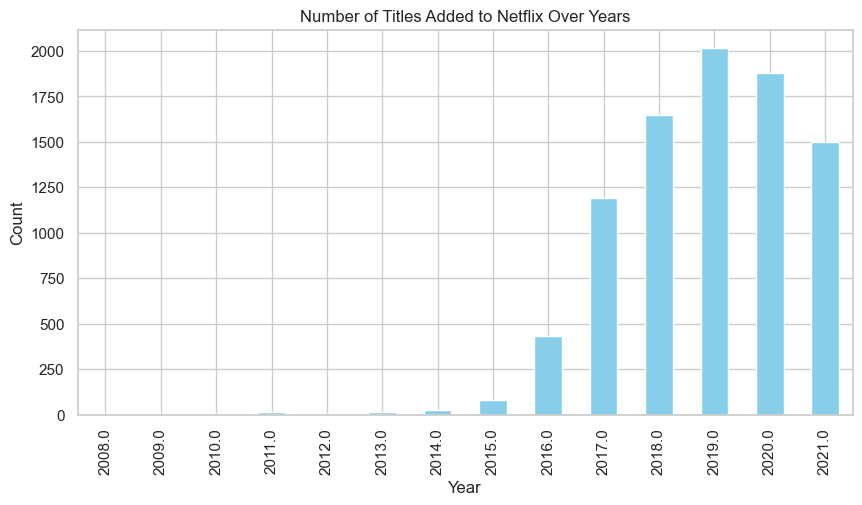

In [16]:
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Titles Added to Netflix Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

C:\Users\Aniket Goswami\AppData\Local\Temp\ipykernel_29576\3360165561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


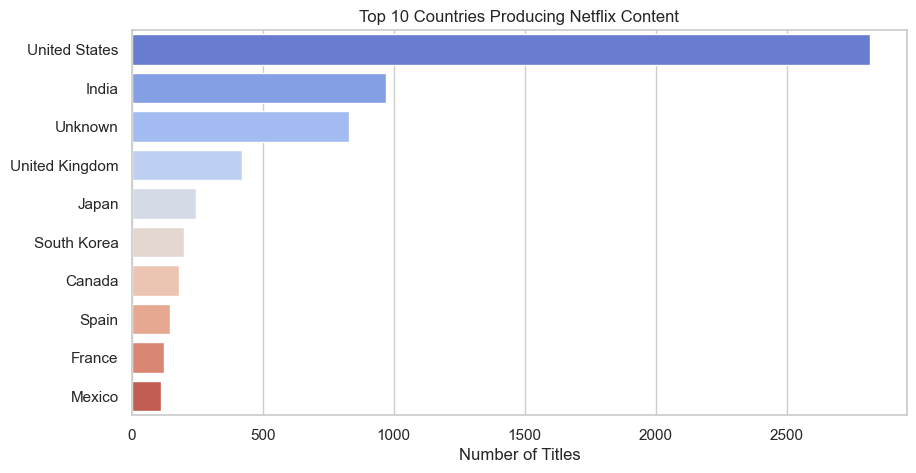

In [17]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('')
plt.show()

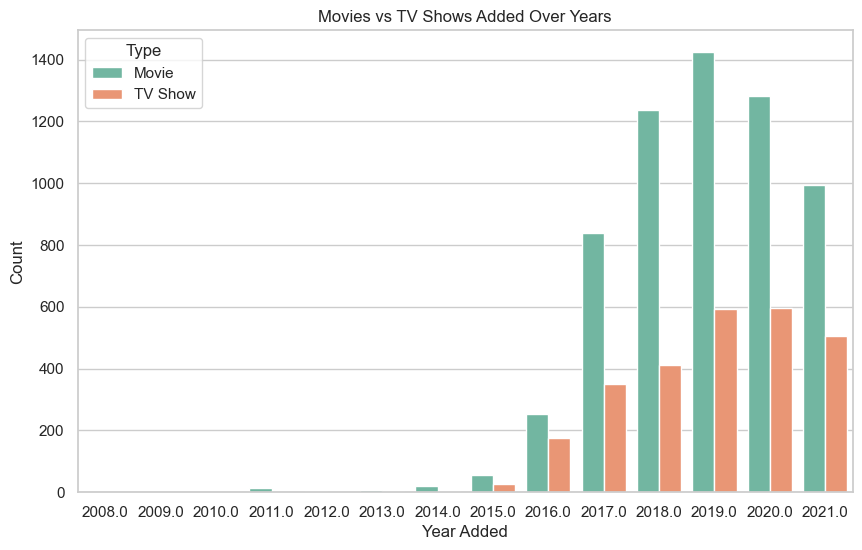

In [19]:
#Bivariate Analysis - Relationshio between two variables
plt.figure(figsize=(10,6))
sns.countplot(x='year_added', hue='type', data=df, palette='Set2')
plt.title('Movies vs TV Shows Added Over Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

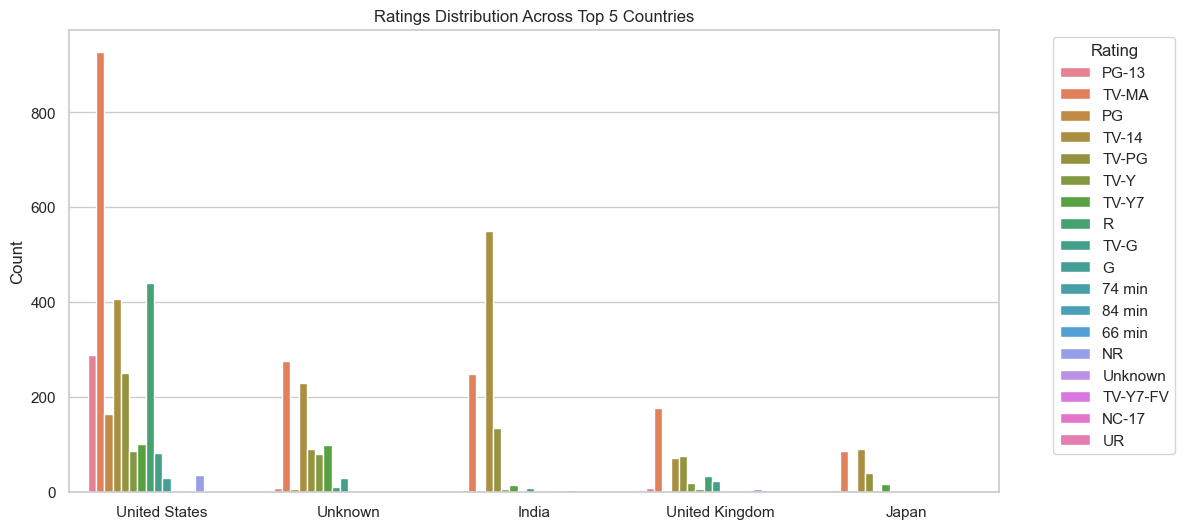

In [20]:
top5 = df[df['country'].isin(top_countries.index[:5])]
plt.figure(figsize=(12,6))
sns.countplot(x='country', hue='rating', data=top5)
plt.title('Ratings Distribution Across Top 5 Countries')
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Aniket Goswami\AppData\Local\Temp\ipykernel_29576\1677485329.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')


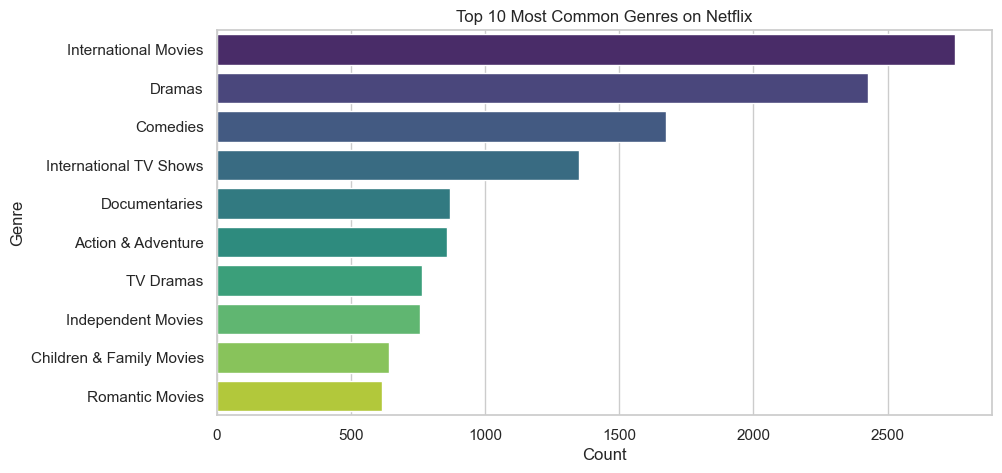

In [21]:
from collections import Counter
genre_list = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
genre_counts = Counter([g for sublist in genre_list for g in sublist])
genre_df = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.show()

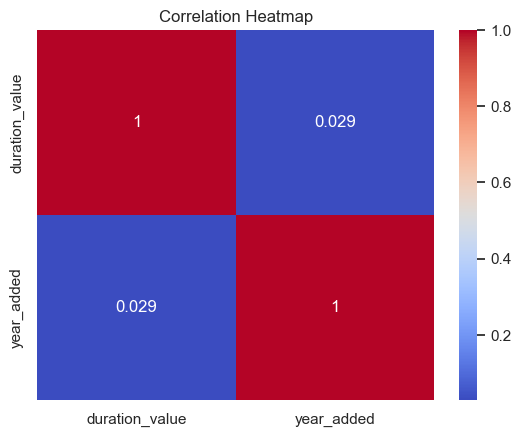

In [22]:
#Correlation Analysis - Measures the strength and direction of the relationship between two or more variables
df_corr = df[['duration_value', 'year_added']].corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

